# Vegetable Classification

Data from: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
# ! kaggle competitions download name of data set

In [18]:
! kaggle datasets download misrakahmed/vegetable-image-dataset

100% 534M/534M [00:28<00:00, 16.1MB/s]
100% 534M/534M [00:28<00:00, 20.0MB/s]


In [19]:
! ls
! sudo apt-get install unzip

kaggle.json  sample_data  vegetable-image-dataset.zip
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [20]:
! unzip vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [21]:
!ls

 kaggle.json   sample_data   vegetable-image-dataset.zip  'Vegetable Images'


In [22]:
! mv "Vegetable Images" "veg_img"

In [23]:
!ls

kaggle.json  sample_data  vegetable-image-dataset.zip  veg_img


In [24]:
! cd veg_img

In [25]:
! cd veg_img
! ls
! pwd

kaggle.json  sample_data  vegetable-image-dataset.zip  veg_img
/content


# Start going through data

In [26]:
# Interesting setup: Several folders with lots of images

# To do: Go through the folders and get the images

In [27]:
DIR = os.getcwd()
DAT_DIR = DIR + '/veg_img'
DAT_TRAIN = DAT_DIR + '/train/'
DAT_TEST = DAT_DIR + '/test/'
DAT_VAL = DAT_DIR + '/validation/'
MODEL_DIR = DAT_DIR + '/models/'

In [28]:
print(len(os.listdir(DAT_TRAIN)))
print(len(os.listdir(DAT_TEST)))
print(len(os.listdir(DAT_VAL)))

15
15
15


In [29]:
for i in os.listdir(DAT_TRAIN):
  print(os.path.join(DAT_TRAIN, i, 'hello_there'))

/content/veg_img/train/Cucumber/hello_there
/content/veg_img/train/Pumpkin/hello_there
/content/veg_img/train/Potato/hello_there
/content/veg_img/train/Radish/hello_there
/content/veg_img/train/Bottle_Gourd/hello_there
/content/veg_img/train/Broccoli/hello_there
/content/veg_img/train/Papaya/hello_there
/content/veg_img/train/Cabbage/hello_there
/content/veg_img/train/Bitter_Gourd/hello_there
/content/veg_img/train/Bean/hello_there
/content/veg_img/train/Capsicum/hello_there
/content/veg_img/train/Carrot/hello_there
/content/veg_img/train/Tomato/hello_there
/content/veg_img/train/Cauliflower/hello_there
/content/veg_img/train/Brinjal/hello_there


In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler, EarlyStopping

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

IMG_SIZE = 299  # VGG16 224, InceptionV3 299
BATCH_SIZE = 128
EPOCHS = 2

# Define the ImageDataGenerator parameters for data augmentation (you can adjust these as needed)
train_datagen = ImageDataGenerator(
    rescale=1./255,        # normalize pixel values to be between 0 and 1
    shear_range=0.2,       # shear transformations
    zoom_range=0.2,        # zoom transformations
    horizontal_flip=True   # horizontal flips
)


test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to generate the training set
train_generator = train_datagen.flow_from_directory(
    DAT_TRAIN,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical' ,                           # specify the class mode (binary or categorical)
    shuffle = True

)

# Use flow_from_directory to generate the testing set
test_generator = test_datagen.flow_from_directory(
    DAT_TEST,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical',                            # specify the class mode (binary or categorical)
    shuffle = False
)

# Use flow_from_directory to generate the validation set
val_generator = val_datagen.flow_from_directory(
    DAT_VAL,
    target_size=(IMG_SIZE, IMG_SIZE),  # specify the target size of the images
    batch_size=BATCH_SIZE,                         # specify the batch size
    class_mode='categorical',                            # specify the class mode (binary or categorical)
    shuffle = False
)



# Early stopping callback, stops the training if there's no more progress
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    min_delta=0.001,
    mode='max'
)

# Learning rate scheduler callback, decreases the LR during training
def lr_scheduler(epoch, lr):
    if epoch == 3:
        lr = lr/10       # After 3 epochs, divide by 10

    if epoch == 6:
        return lr/10

    if epoch == 10:
        return lr/10

    return lr

lr_scheduler_callback = LearningRateScheduler(
    lr_scheduler
)

# Model checkpoint callback, stores the model every few epochs during training
model_checkpoint_callback = ModelCheckpoint(
    MODEL_DIR + 'model_checkpoint',
    monitor="val_acc",
    verbose=1,
    save_weights_only=False,
    mode="auto",
    # save_freq="epoch"
)

def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [33]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [34]:
type(train_generator.next())

tuple

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(64, 299, 299, 3)
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


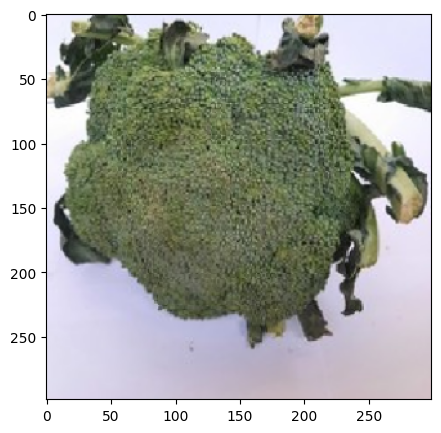

In [35]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = train_generator.next()

print(type(batch_images))
print(type(batch_labels))

print((batch_images).shape)
print(list(train_generator.class_indices.keys()))
print((batch_labels)[0])

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(batch_images[0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(128, 299, 299, 3)
['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


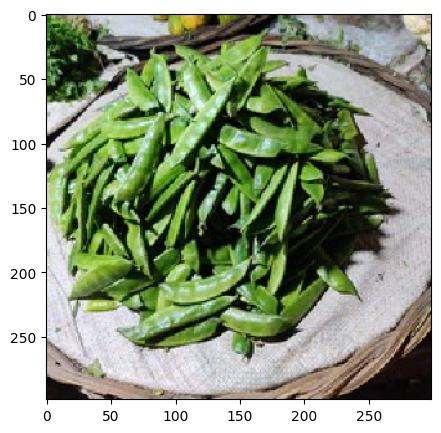

In [86]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = test_generator.next()

print(type(batch_images))
print(type(batch_labels))

print((batch_images).shape)
print(list(train_generator.class_indices.keys()))
print((batch_labels)[6])

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.imshow(batch_images[6])

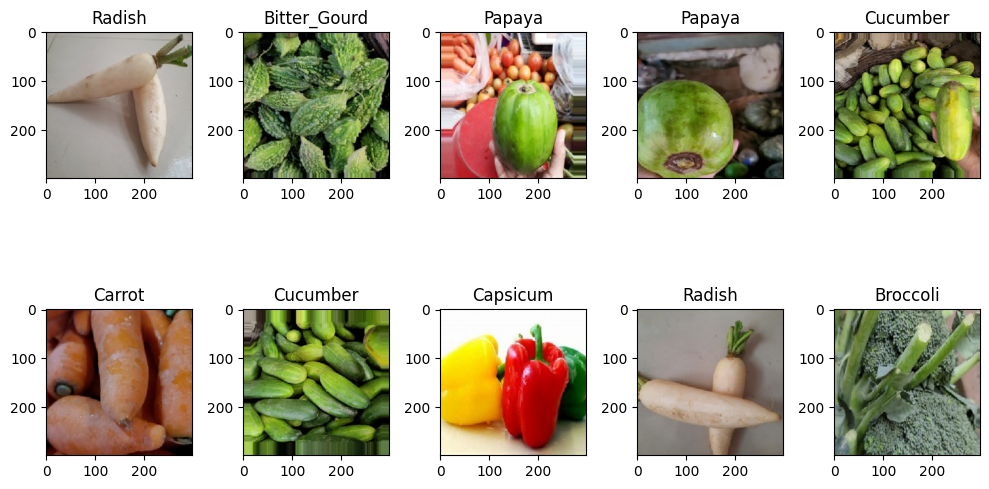

In [79]:
# Get a batch of images and labels from the generator
batch_images, batch_labels = train_generator.next()

# Extract the class indices from the one-hot encoded labels
class_indices = batch_labels.argmax(axis=1)

# Get the class labels from the generator
class_labels = list(train_generator.class_indices.keys())

# Define a 2x5 grid for plotting
rows, cols = 2, 5

# Create a Matplotlib figure and axis
fig, axes = plt.subplots(rows, cols, figsize=(10, 6))

# Plot each image with its corresponding class name
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        axes[i, j].imshow(batch_images[index])
        axes[i, j].set_title(class_labels[class_indices[index]])
        axes[i, j].axis('on')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Modelling - Load pre trained models

In [80]:
######################################
#
# Pre trained:    InceptionV3
#
######################################

from keras.applications.inception_v3 import InceptionV3
from keras.optimizers import RMSprop
from keras import layers
import keras
from PIL import Image
import datetime
from keras.callbacks import TensorBoard, ModelCheckpoint, LearningRateScheduler, EarlyStopping

NUM_CLASSES = len(os.listdir(DAT_TRAIN))

# Define Tensorboard callback with dedicated log directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_callback = TensorBoard(log_dir=log_dir, update_freq=1)

def InitializeInceptionV3Model():
    pre_trained_model = InceptionV3(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top=False, weights = 'imagenet')

    for layer in pre_trained_model.layers:
        layer.trainable=False

    x = layers.Flatten()(pre_trained_model.output)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(NUM_CLASSES, activation='softmax')(x)

    model = keras.Model(pre_trained_model.input, x)
    return model


if 'model' in locals() or 'model' in globals():
    if input('Train a fresh model?') == 'y':
        print('Discarding current model')
        model = InitializeInceptionV3Model()
else:
    model = InitializeInceptionV3Model()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Train a fresh model?y
Discarding current model


In [81]:
hist = model.fit(
    train_generator,
    epochs=EPOCHS,
    # steps_per_epoch=int(len(train_generator)/BATCH_SIZE)/3,
    validation_data=val_generator,
    # validation_steps=int(len(val_generator)/BATCH_SIZE)/3,
    verbose=1,
    callbacks=[early_stopping, tb_callback])


Epoch 1/2
118/118 [==============================] - 364s 3s/step - loss: 5.9712 - accuracy: 0.8966 - val_loss: 0.1333 - val_accuracy: 0.9913
Epoch 2/2
118/118 [==============================] - 354s 3s/step - loss: 0.1377 - accuracy: 0.9867 - val_loss: 0.1372 - val_accuracy: 0.9890


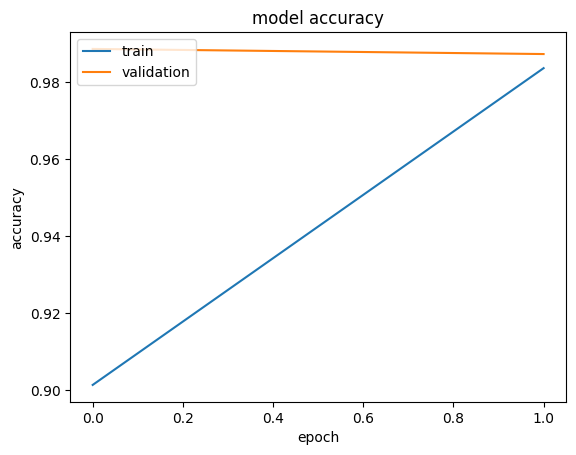

In [48]:
plot_hist(hist)

In [ ]:
##################################################
# Fine tune InceptionV3 model
##################################################

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.000005, momentum=0.9),
                            loss='categorical_crossentropy',
                            metrics=['acc'])

hist = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=int(len(train_dataframe)/BATCH_SIZE/4),
    validation_data=val_generator,
    validation_steps=int(len(val_dataframe)/BATCH_SIZE/4),
    verbose=1,
    callbacks=[early_stopping, tb_callback])

plot_hist(hist)

In [51]:
#######################################################
#  Save the model
#######################################################

# TODO: model name in filename
model.save(MODEL_DIR + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +
    'model_' + 'inceptionv3' +
    '_' + str(NUM_CLASSES) + '_classes' +
    str(IMG_SIZE) + '_img_size')

In [53]:
#######################################################
#  Load a model
#######################################################
from keras import models

#model = models.load_model(MODEL_DIR + 'model_checkpoint')
model = models.load_model(MODEL_DIR + '20231127-080753model_inceptionv3.15classes299img_size')

In [71]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(test_generator)

# Print the test accuracy
test_accuracy = evaluation_result[1]  # Assuming accuracy is the second metric
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

24/24 [==============================] - 13s 534ms/step - loss: 0.0811 - accuracy: 0.9890
Test Accuracy: 98.90%


In [98]:
files = test_generator.filenames
class_dict = test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   # dictionary of the form class index: class name

predictions = model.predict(test_generator)


for i, p in enumerate(predictions):
    if i < 200:
      continue
    index=np.argmax(p)
    klass=rev_dict[index]
    prob=p[index]
    print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)
    if i == 210:
      break

24/24 [==============================] - 13s 552ms/step
for file  Bitter_Gourd/1201.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1202.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1203.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1204.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1205.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1206.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1207.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1208.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1209.jpg  predicted class is  Bitter_Gourd  with probability  0.99999976
for file  Bitter_Gourd/1210.jpg  predicted class is  Bitter_Gourd  with probability  1.0
for file  Bitter_Gourd/1211.jpg  predicted clas

4/4 [==============================] - 0s 125ms/step


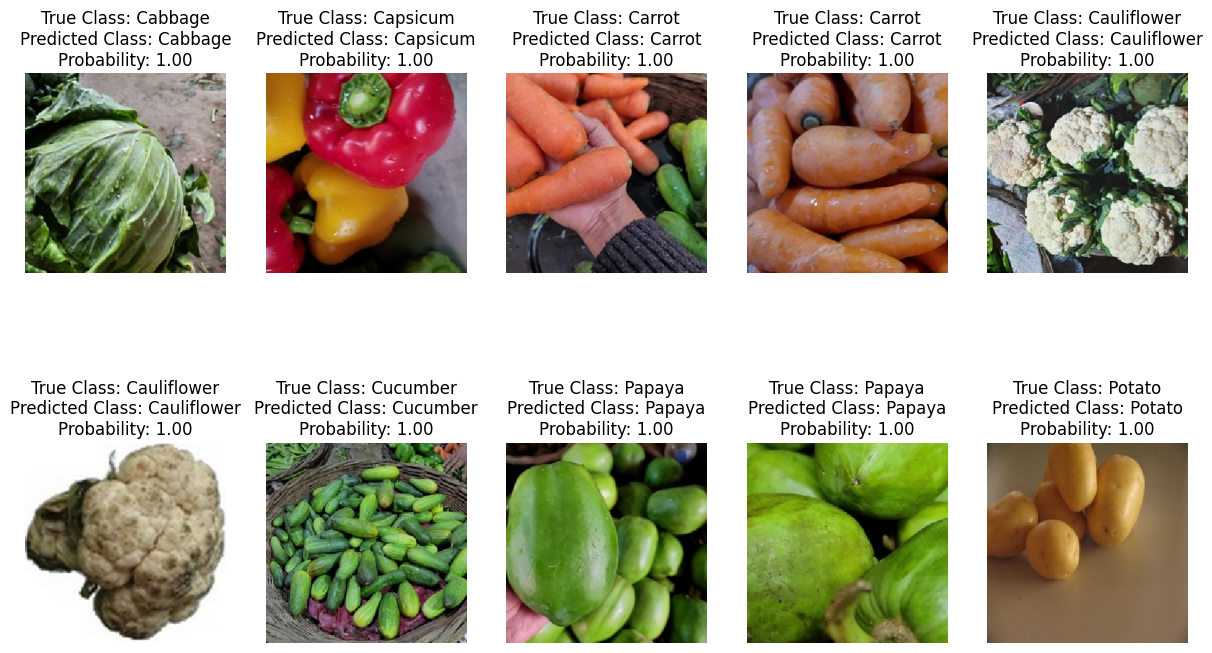

In [158]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_dict = test_generator.class_indices
rev_dict = {value: key for key, value in class_dict.items()}

# Set up a 2x5 subplot grid for displaying images and predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
fig.subplots_adjust(hspace=0.5)

# Iterate over the generator directly
for i in range(10):
    img_batch, label_batch = next(test_generator)

    # Make predictions for the current batch
    predictions = model.predict(img_batch)

    for j in range(len(img_batch)):
        true_class_index = np.argmax(label_batch[j])
        true_class = rev_dict[true_class_index]

        predicted_class_index = np.argmax(predictions[j])
        predicted_class = rev_dict[predicted_class_index]
        prob = predictions[j][predicted_class_index]

        # Load and display the image
        img = img_batch[j]
        ax = axes[i // 5, i % 5]
        ax.imshow(img)  # Normalize pixel values to [0, 1]
        ax.set_title(f"True Class: {true_class}\nPredicted Class: {predicted_class}\nProbability: {prob:.2f}")
        ax.axis("off")

plt.show()


In [160]:
class_dict.items()

dict_items([('Bean', 0), ('Bitter_Gourd', 1), ('Bottle_Gourd', 2), ('Brinjal', 3), ('Broccoli', 4), ('Cabbage', 5), ('Capsicum', 6), ('Carrot', 7), ('Cauliflower', 8), ('Cucumber', 9), ('Papaya', 10), ('Potato', 11), ('Pumpkin', 12), ('Radish', 13), ('Tomato', 14)])

In [161]:
quick_id = 4
print(files[quick_id])
print(class_dict)
print(predictions[quick_id])
print(np.argmax(predictions[quick_id]))

Bean/0005.jpg
{'Bean': 0, 'Bitter_Gourd': 1, 'Bottle_Gourd': 2, 'Brinjal': 3, 'Broccoli': 4, 'Cabbage': 5, 'Capsicum': 6, 'Carrot': 7, 'Cauliflower': 8, 'Cucumber': 9, 'Papaya': 10, 'Potato': 11, 'Pumpkin': 12, 'Radish': 13, 'Tomato': 14}
[9.1379604e-29 4.7136681e-34 6.1873774e-27 4.8974847e-16 6.1203251e-37
 1.8790016e-31 2.9981975e-22 4.5089206e-30 1.2218476e-28 3.7262894e-18
 1.0000000e+00 2.2858443e-32 1.8405778e-25 2.4539999e-32 2.7193011e-28]
10


In [190]:
#######################################################
#  Classify the test set
#######################################################

# Classify
test_generator.reset()
probabilities = model.predict(test_generator)
filenames = test_generator.filenames.copy()
for i in range(0,len(filenames)):
    filenames[i] = filenames[i][filenames[i].rfind('\\')+1:]
predicted_class_indices = np.argmax(probabilities, axis=-1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

# Create the pandas DataFrame
results=pd.DataFrame({"img_name":filenames,
                      "prediction":predictions})

results.to_csv(DAT_DIR + '/predictions.csv', index=False)
results

24/24 [==============================] - 14s 604ms/step


,img_name,prediction
0,Bean/0001.jpg,Bean
1,Bean/0002.jpg,Bean
2,Bean/0003.jpg,Bean
3,Bean/0004.jpg,Bean
4,Bean/0005.jpg,Bean
...,...,...
2995,Tomato/1196.jpg,Tomato
2996,Tomato/1197.jpg,Tomato
2997,Tomato/1198.jpg,Tomato
2998,Tomato/1199.jpg,Tomato


In [192]:
for i in range(results.shape[0]):
  if results.iloc[i, :]['prediction'] not in results.iloc[i, :]['img_name']:
    print(results.iloc[i, :])

img_name      Bean/0130.jpg
prediction           Radish
Name: 52, dtype: object
img_name      Bitter_Gourd/1290.jpg
prediction                     Bean
Name: 289, dtype: object
img_name      Bitter_Gourd/1326.jpg
prediction                  Pumpkin
Name: 325, dtype: object
img_name      Bitter_Gourd/1357.jpg
prediction                 Broccoli
Name: 356, dtype: object
img_name      Bitter_Gourd/1369.jpg
prediction                 Broccoli
Name: 368, dtype: object
img_name      Bitter_Gourd/1396.jpg
prediction                  Pumpkin
Name: 395, dtype: object
img_name      Bottle_Gourd/1017.jpg
prediction                   Radish
Name: 416, dtype: object
img_name      Bottle_Gourd/1040.jpg
prediction                   Radish
Name: 439, dtype: object
img_name      Bottle_Gourd/1043.jpg
prediction                   Radish
Name: 442, dtype: object
img_name      Bottle_Gourd/1113.jpg
prediction                   Radish
Name: 512, dtype: object
img_name      Bottle_Gourd/1154.jpg
prediction 

In [193]:
results.iloc[2198, :]

img_name      Papaya/1399.jpg
prediction            Brinjal
Name: 2198, dtype: object